

## **FullName: Suresh Methuku**
## **Email: sureshmethuku@gmail.com**
## **Project: RAG Implementation**

This colab notebook is built to Question-Answering (QA) like a chatbot using Llama-2–7b-chat model with LangChain framework and ChromaDB library over the documents which I fetched online from https://docs.nvidia.com/ documentation website. Here is the architectural diagram of the implementation.

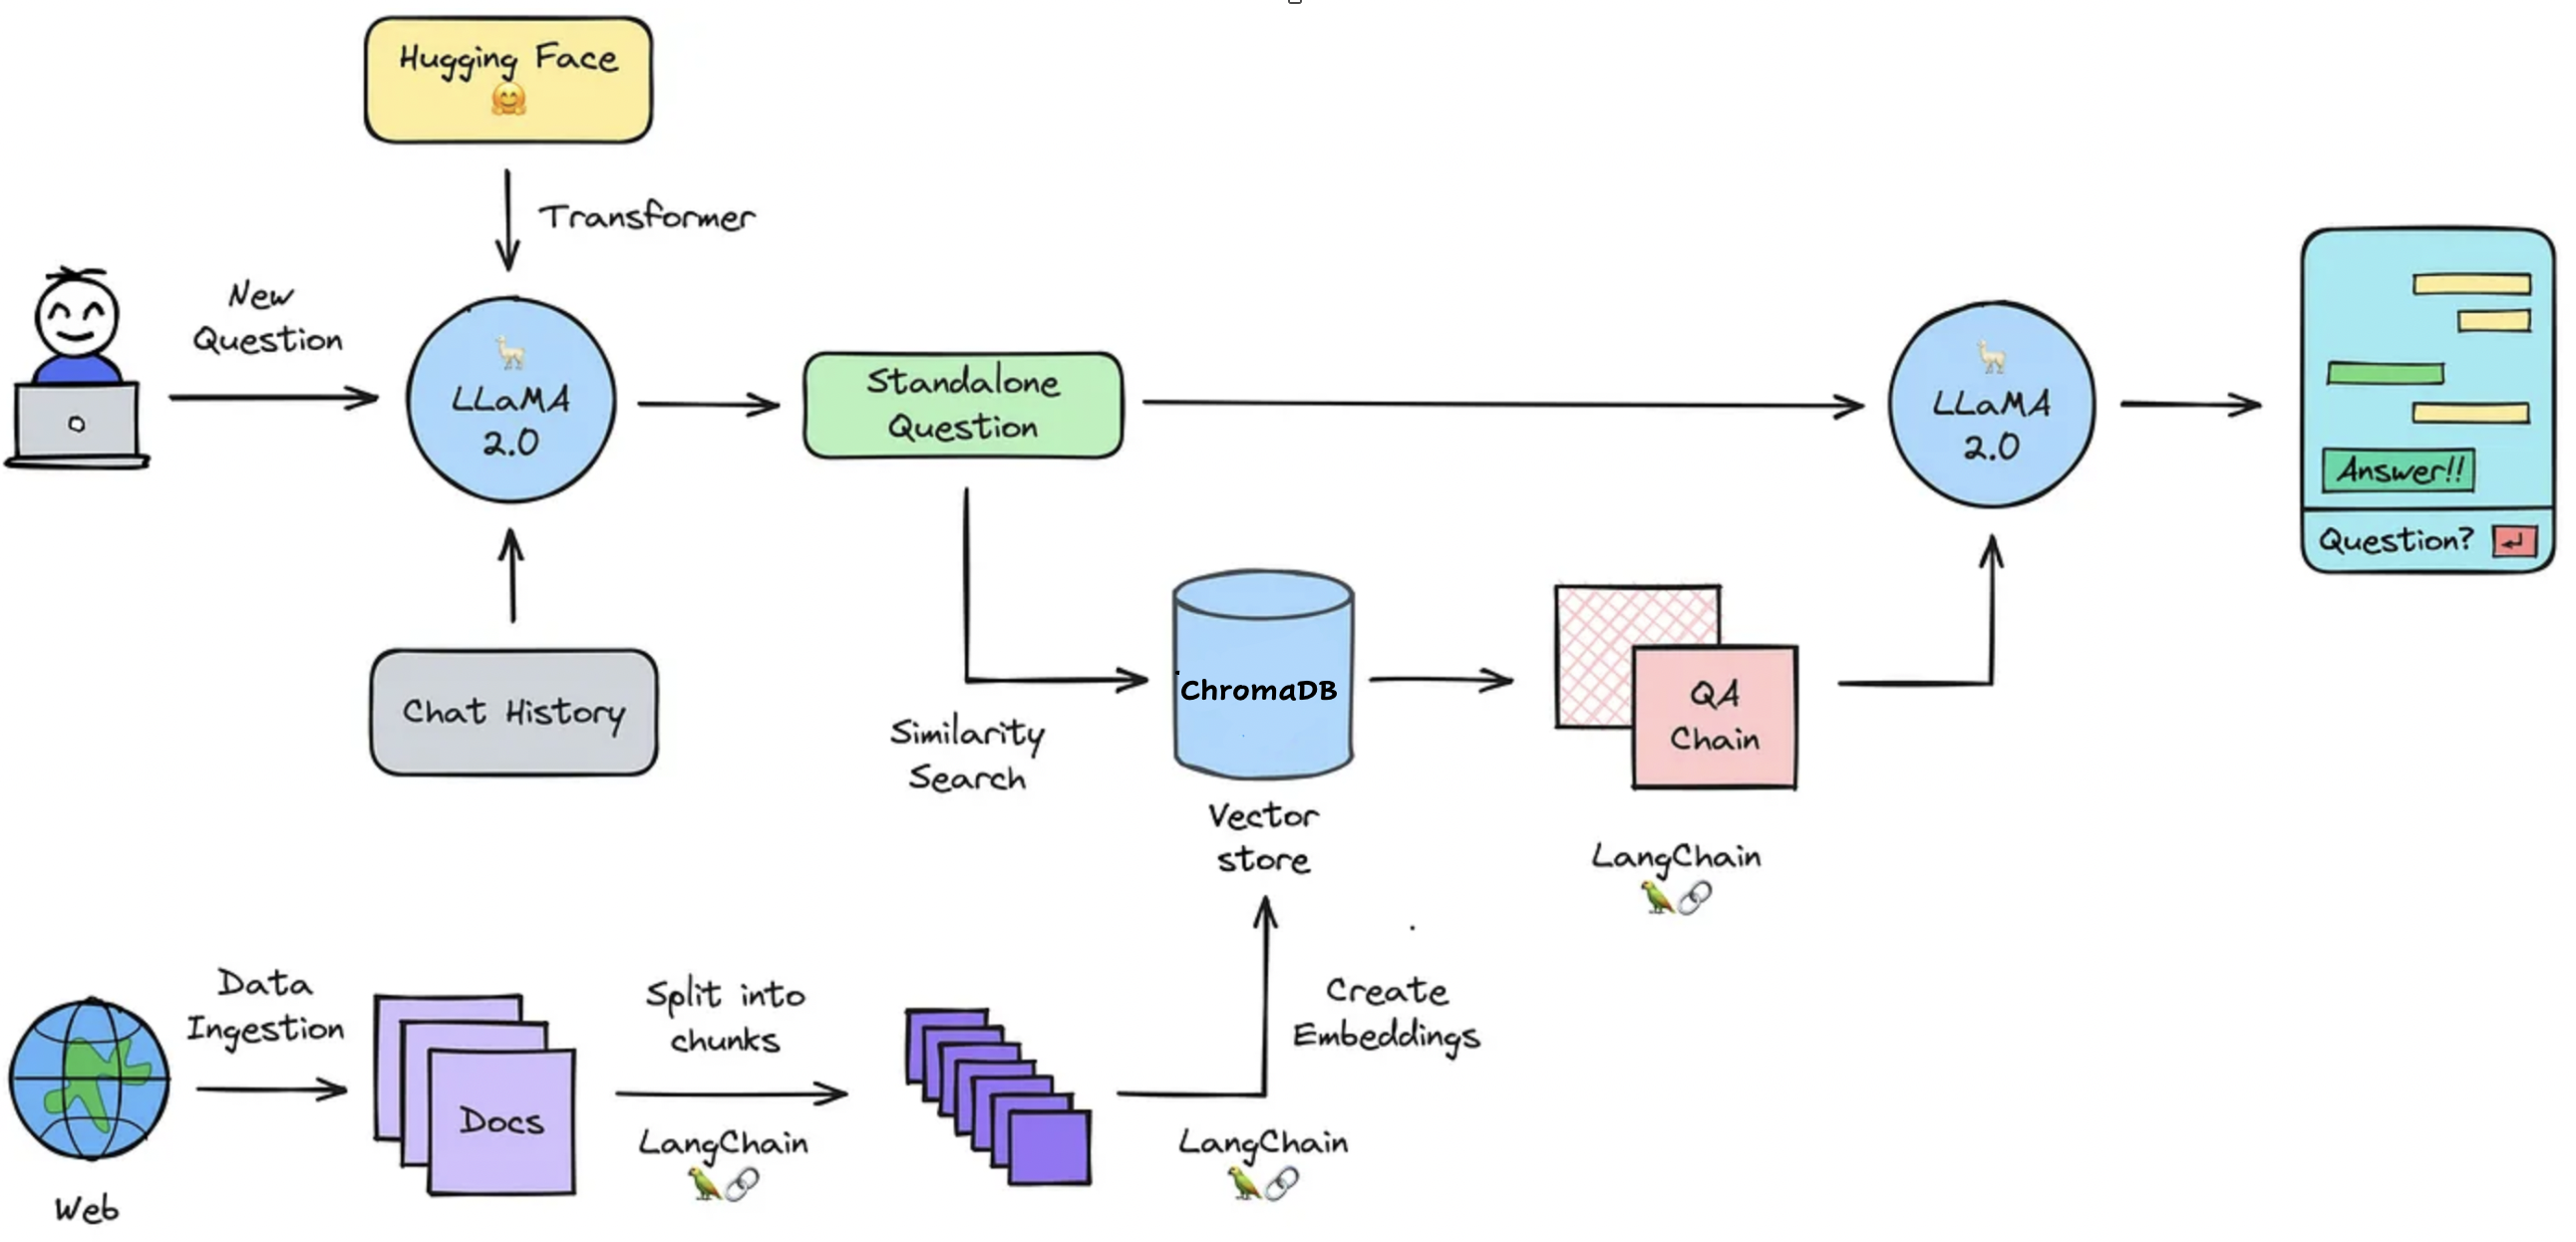

Checking whether a GPU has been assigned to this notebook.
You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to Runtime > Change runtime type in the menu to enable a GPU accelerator, and then re-execute the code cell.

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Nov 21 16:12:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via Runtime > Change runtime type in the menu. Then select High-RAM in the Runtime shape dropdown. After, re-execute the code cell.

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


**Installing all the libraries required for this project**

In [3]:
# Install langchain: A library used for building language models and AI-powered applications.
!pip install langchain --quiet

# Install chromadb: A Python library for working with databases, useful for managing data persistence in applications.
!pip install chromadb --quiet

# Install pypdf: A library for PDF document manipulation, allowing you to read, split, merge, and transform PDF files.
!pip install pypdf --quiet

# Install pytest: A framework for writing and running tests in Python, enhancing code reliability and maintainability.
!pip install pytest --quiet

# Install specific versions of accelerate, transformers, and tokenizers:
# - accelerate: Simplifies running PyTorch models on multi-GPU setups.
# - transformers: Provides state-of-the-art machine learning models.
# - tokenizers: Efficiently handles tokenization needed for text processing.
!pip install accelerate==0.21.0 transformers==4.31.0 tokenizers==0.13.3 --quiet

# Install bitsandbytes and einops:
# - bitsandbytes: Optimizes training of large neural networks with custom CUDA kernels.
# - einops: Provides flexible and powerful tensor operations for readable and reliable code.
!pip install bitsandbytes==0.40.0 einops==0.6.1 --quiet

# Install xformers: A library focused on efficient transformers implementations.
!pip install xformers==0.0.22.post7 --quiet

# Reinstall langchain to a specific version (0.1.4) if needed to ensure compatibility.
!pip install langchain==0.1.4 --quiet

# Install sentence_transformers: A library for obtaining dense vector representations for sentences and paragraphs.
!pip install sentence_transformers==2.2.0 --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.9/617.9 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.7 MB/s eta 0:00:00


In [4]:
# Before I begin websraping, I checked if the robots.txt file exists. Reached out to operations regarding the same, and was recommended to go ahead and do webscraping since its part of my course work.
#Robots.txt exists at https://docs.nvidia.com/robots.txt

# Web Scrapping




**Web Scrapping:**

Following Python script is designed for web crawling and extracting content from web pages, downloading PDF files and saving textual content from specified sections of the website.

In [5]:
# Install the necessary libraries
!pip install beautifulsoup4 requests

import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse, urljoin
import os

def is_valid_url(url, domain):
    """ Check if the URL belongs to the same domain and is a valid URL. """
    parsed_url = urlparse(url)
    return bool(parsed_url.scheme) and bool(parsed_url.netloc) and domain in parsed_url.netloc

def download_pdf(pdf_url, folder):
    """ Download a PDF file to a specified folder. """
    try:
        pdf_response = requests.get(pdf_url)
        pdf_response.raise_for_status()
        pdf_filename = pdf_url.split('/')[-1]
        pdf_path = os.path.join(folder, pdf_filename)
        with open(pdf_path, 'wb') as f:
            f.write(pdf_response.content)
        print(f"Downloaded PDF: {pdf_path}")
    except requests.RequestException as e:
        print(f"Failed to download PDF from {pdf_url}. Reason: {e}")

def crawl_and_save_text_and_pdfs(start_url, depth=1):
    visited = set()  # Set to track visited URLs
    queue = [(start_url, depth)]  # Queue of URLs to crawl
    domain = urlparse(start_url).netloc  # Domain to restrict the crawl within the same site

    while queue:
        current_url, current_depth = queue.pop(0)
        if current_url in visited or current_depth < 0:
            continue

        try:
            response = requests.get(current_url)
            response.raise_for_status()  # Check if the request was successful
            visited.add(current_url)  # Mark this URL as visited

            soup = BeautifulSoup(response.text, 'html.parser')

            # Assuming main content is within <div id="main">, adjust as necessary
            main_content = soup.find('div', id='main')
            if not main_content:
                main_content = soup.find('article')  # A second common wrapper for main content
            if main_content:
                text = main_content.get_text(separator='\n', strip=True)
            else:
                text = 'Main content not found'  # Default message if main content is not identified

            # Determine folder and file name based on URL
            path_segments = urlparse(current_url).path.strip('/').split('/')
            base_folder = path_segments[-2] if len(path_segments) > 1 else 'default_folder'

            # Appending the root folder to base folders
            base_folder = os.path.join("/content/nvidia_data", base_folder)
            filename = path_segments[-1] if path_segments[-1] else 'index'
            filename = filename.replace('.html', '.txt') if '.html' in filename else 'index.txt'

            # Create the base folder if it doesn't exist
            if not os.path.exists(base_folder):
                os.makedirs(base_folder)

            # Full path to save the file
            file_path = os.path.join(base_folder, filename)
            with open(file_path, 'w', encoding='utf-8') as file:
                file.write(text)
            print(f"Text content saved to {file_path}")

            # Find all links, download PDFs, and add other links to queue if within the same domain
            for link in soup.find_all('a', href=True):
                href = urljoin(current_url, link['href'])
                if href.endswith('.pdf') and is_valid_url(href, domain):
                    download_pdf(href, base_folder)
                elif is_valid_url(href, domain) and href not in visited:
                    queue.append((href, current_depth - 1))

        except requests.RequestException as e:
            print(f"Failed to fetch {current_url}. Reason: {e}")


In [6]:
# Webscraping nivida documentaion with a depth of 1, and saving the content and pdfs to local drive.
# Webscraping with depth of 1 ran under 20 seconds, with a depth of 2 took 50 mins.
crawl_and_save_text_and_pdfs('https://docs.nvidia.com', depth=1)

Text content saved to /content/nvidia_data/default_folder/index.txt
Text content saved to /content/nvidia_data/default_folder/index.txt
Text content saved to /content/nvidia_data/default_folder/index.txt
Text content saved to /content/nvidia_data/default_folder/index.txt
Text content saved to /content/nvidia_data/default_folder/index.txt
Text content saved to /content/nvidia_data/default_folder/index.txt
Text content saved to /content/nvidia_data/nim/index.txt
Text content saved to /content/nvidia_data/ai-enterprise/index.txt
Downloaded PDF: /content/nvidia_data/ai-enterprise/nvidia-ai-enterprise-and-charmed-kubernetes-deployment-guide.pdf
Downloaded PDF: /content/nvidia_data/ai-enterprise/nvidia-ai-enterprise-and-charmed-kubernetes-deployment-guide.pdf
Downloaded PDF: /content/nvidia_data/ai-enterprise/enterprise-support-services-user-guide.pdf
Downloaded PDF: /content/nvidia_data/ai-enterprise/enterprise-support-services-user-guide.pdf
Text content saved to /content/nvidia_data/doc/i

# Data Loading

In [7]:
# Import the PyPDFDirectoryLoader class from the langchain library.
# This class is designed to load PDF documents from a directory.
from langchain.document_loaders.pdf import PyPDFDirectoryLoader

def load_pdfs(directory):
    """
    Load PDF documents from a specified directory.

    Args:
    directory (str): The path to the directory containing PDF files.

    Returns:
    list: A list of document contents loaded from the PDF files in the directory.
    """

    loader = PyPDFDirectoryLoader(directory)
    documents = loader.load()
    return documents

In [8]:
# Importing the RecursiveCharacterTextSplitter class from the langchain library.
# This class is used for splitting texts into smaller chunks.
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Importing the Document class from the langchain library.
# This class represents a structured document format.
from langchain.schema.document import Document

def split_documents(documents: list[Document]):
  """
  Split each document in the list into smaller text chunks.

  Args:
  documents (list[Document]): A list of Document objects to be split.

  Returns:
  list[list[str]]: A list of lists, where each sublist contains the text chunks of a corresponding document.
  """
  text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50, length_function=len,)
  texts = text_splitter.split_documents(documents)
  return texts


The following function calculate_chunk_ids is used to systematically assign unique identifiers to each chunk in a list based on their source document and page number. This helps in tracking and referring to specific chunks, especially in contexts where the chunks need to be cross-referenced or indexed efficiently.

In [9]:
def calculate_chunk_ids(chunks):
    """
    Assign unique IDs to each chunk based on its source and page information.

    Args:
    chunks (list): A list of chunk objects, each with a metadata dictionary containing 'source' and 'page'.

    Returns:
    list: The same list of chunks, but each chunk's metadata is updated with a unique 'id'.
    """

    last_page_id = None
    current_chunk_index = 0

    for chunk in chunks:
        source = chunk.metadata.get("source")
        page = chunk.metadata.get("page")
        current_page_id = f"{source}:{page}"

        # If the page ID is the same as the last one, increment the index.
        if current_page_id == last_page_id:
            current_chunk_index += 1
        else:
            current_chunk_index = 0

        # Calculate the chunk ID.
        chunk_id = f"{current_page_id}:{current_chunk_index}"
        last_page_id = current_page_id

        # Add it to the page meta-data.
        chunk.metadata["id"] = chunk_id

    return chunks



The following function configures and returns an instance of HuggingFaceEmbeddings, set up with a pre-trained model suitable for embedding generation. The function specifically initializes the embeddings with GPU support by setting the device to cuda, which is essential for performance optimization when processing large datasets or in real-time applications. This approach abstracts the setup details, allowing easy reuse of the embeddings functionality elsewhere in your application.

In [10]:
# Import the necessary classes from the langchain library.
# HuggingFaceEmbeddings for loading and using pre-trained embeddings models.
# Chroma is imported but not used in the provided code snippet.
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma

def get_embedding_function():
    """
    Initialize and return a HuggingFace embedding model pre-configured for use.

    Returns:
    HuggingFaceEmbeddings: An instance of HuggingFaceEmbeddings initialized with a specific model.
    """
    # Define the model name to use for the embeddings; here, a model from sentence-transformers is used.
    model_name = "sentence-transformers/all-mpnet-base-v2"

    # Specify additional model arguments; here, setting the device to 'cuda' to use GPU acceleration.
    model_kwargs = {"device": "cuda"}

    # Initialize the embeddings object with the specified model and additional arguments.
    embeddings = HuggingFaceEmbeddings(model_name=model_name, model_kwargs=model_kwargs)

    # Return the initialized embeddings object, ready for generating embeddings.
    return embeddings


The below function effectively manages document storage by ensuring that only new and unique document chunks are added to the Chroma database. It uses a combination of ID generation and checking against existing entries to prevent duplicates, which is essential for maintaining an efficient and clean dataset. This approach is particularly useful in applications where documents are continuously added over time, such as in a crawling or data ingestion system.

In [11]:
from langchain.vectorstores import Chroma  # Import the Chroma class used for handling vector storage.

def add_to_chroma(chunks: list[Document]):
    """
    Add unique document chunks to the Chroma database if they are not already present.

    Args:
    chunks (list[Document]): A list of document chunks, where each chunk is an instance of Document.

    The function performs the following steps:
    - Initializes the Chroma database.
    - Assigns unique IDs to each chunk based on metadata.
    - Checks for existing documents in the database.
    - Adds only new documents that are not already present.
    """

    # Load the existing Chroma database or initialize a new one in the specified directory
    # and set the embedding function for new documents.
    db = Chroma(
        persist_directory='/content/chroma',
        embedding_function=get_embedding_function()
    )

    # Calculate unique IDs for each chunk to ensure each document is uniquely identifiable.
    chunks_with_ids = calculate_chunk_ids(chunks)

    # Retrieve the existing documents from the database to avoid duplicates.
    # Here 'include=[]' implies that only document IDs are retrieved, as they are included by default.
    existing_items = db.get(include=[])
    existing_ids = set(existing_items["ids"])  # Convert the list of IDs to a set for faster lookup.
    print(f"Number of existing documents in DB: {len(existing_ids)}")

    # Filter out chunks that are already in the database using their IDs.
    new_chunks = []
    for chunk in chunks_with_ids:
        if chunk.metadata["id"] not in existing_ids:
            new_chunks.append(chunk)

    # Add new chunks to the database only if there are any.
    if len(new_chunks):
        print(f"👉 Adding new documents: {len(new_chunks)}")
        new_chunk_ids = [chunk.metadata["id"] for chunk in new_chunks]  # List of IDs for the new chunks.
        db.add_documents(new_chunks, ids=new_chunk_ids)  # Add new documents along with their IDs to the database.
        db.persist()  # Persist changes to the database.
    else:
        print("No new documents to add")


The following block of code creates a pipeline for processing PDF documents stored in a specific directory. It involves reading the PDFs, splitting them into manageable chunks, and storing these chunks in a database, ensuring that each step is clear and the entire workflow is efficiently documented for easy understanding and maintenance

In [12]:
# Directory where PDF documents are stored.
directory = '/content/nvidia_data'

# Load PDF documents from the specified directory.
# The function load_pdfs() reads PDF files from the directory,
# extracts their content, and returns them as a list of Document objects.
documents = load_pdfs(directory)

# Split the loaded documents into smaller chunks.
# The function split_documents() takes a list of Document objects and splits
# each document into smaller parts based on specified criteria (like size and overlap),
# returning a list of smaller document chunks.
chunks = split_documents(documents)

# Add the split document chunks to the Chroma vector store.
# The function add_to_chroma() processes each chunk, assigns unique IDs,
# and adds them to a Chroma database, ensuring no duplicates are added.
# It updates the database with new document chunks and persists changes.
add_to_chroma(chunks)

PdfStreamError: Stream has ended unexpectedly

In [ ]:
# Print the total number of documents that were loaded.
# This helps in verifying how many documents were read from the directory.
print(f"Number of docs: {len(documents)}")

# Print the total number of document chunks that were created after splitting the documents.
# This is useful for understanding the extent of the data processing and ensuring the splitting operation worked as expected.
print(f"Number of chunks created: {len(chunks)}")



NameError: name 'documents' is not defined

# Model

In [ ]:
# Import specific modules from the PyTorch library.
# 'cuda' for interfacing with CUDA-enabled GPUs for accelerated computing.
# 'bfloat16' for using the bfloat16 half-precision floating point data type, beneficial for neural network training.
from torch import cuda, bfloat16

# Import the entire transformers library.
# This library provides pre-trained models and utilities for natural language processing tasks.
import transformers

# Import the 'userdata' module from the google.colab library.
# This module is used for managing user data within Google Colab notebooks, typically for storing or retrieving user-specific settings or configurations.
from google.colab import userdata



The following block of code involves configuring and loading a Llama-2 llm, tokenizer from Hugging Face's Transformers library.

In [ ]:
# Define the identifier for the model to be loaded. This is used to specify the exact model from Hugging Face.
model_id = 'meta-llama/Llama-2-7b-chat-hf'

# Determine the device to run the model on. If CUDA (GPU support) is available, use the current CUDA device; otherwise, use the CPU.
device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

# Set the quantization configuration using the 'bitsandbytes' library to load large models with reduced GPU memory usage.
# - load_in_4bit: Enable loading model weights in 4-bit precision.
# - bnb_4bit_quant_type: Specify the type of 4-bit quantization ('nf4' here implies 'noise-free 4-bit').
# - bnb_4bit_use_double_quant: Enable using double quantization for potentially higher precision.
# - bnb_4bit_compute_dtype: Set the data type for computations, here using bfloat16 to balance performance and precision.
bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=bfloat16
)

# Prepare to load the model configuration from Hugging Face with specific settings.
# - Access token is retrieved from the user's Google Colab environment to authenticate with Hugging Face.
model_config = transformers.AutoConfig.from_pretrained(
    model_id,
    token = userdata.get('hf_token'),
)

# Load the actual model with the specified configuration and quantization settings.
# - 'trust_remote_code': Allows running custom code from the model repository (use with caution).
# - 'device_map': 'auto' for automatic device selection based on availability and model requirements.
# - 'cache_dir': Specifies a directory to store and retrieve model files, reducing bandwidth on subsequent loads.
model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    config=model_config,
    quantization_config=bnb_config,
    device_map='auto',
    cache_dir="/content/base_models",
    token = userdata.get('hf_token'),
)

# Load the tokenizer associated with the model. Tokenizers convert text to a format that the model can process.
# - Tokenizers are cached in the specified directory alongside the model.
tokenizer = transformers.AutoTokenizer.from_pretrained(
    model_id,
    token = userdata.get('hf_token'),
    cache_dir="/content/base_models"
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda122.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 122
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda122.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('8013'), PosixPath('http'), PosixPath('//172.28.0.1')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//colab.research.google.com/tun/m/cc483011

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

You are calling `save_pretrained` to a 4-bit converted model, but your `bitsandbytes` version doesn't support it. If you want to save 4-bit models, make sure to have `bitsandbytes>=0.41.3` installed.


tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [ ]:
# Create a text generation pipeline using Hugging Face's Transformers library.
# This pipeline is set up to generate text using the specified model and tokenizer.
generate_text = transformers.pipeline(
    model=model,  # Specify the pre-loaded language model.
    tokenizer=tokenizer,  # Specify the tokenizer for processing input text.
    return_full_text=True,  # Ensures the generated text includes the input (expected by langchain).
    task='text-generation',  # Defines the task as text generation.

    # The following parameters control the behavior and output of the model during text generation:

    #stopping_criteria=stopping_criteria,  # Controls when the model should stop generating text.
                                          # Uncomment and define `stopping_criteria` to prevent excessive output length.

    temperature=0.1,  # Sets the "temperature" of generation, affecting randomness.
                      # A lower temperature (closer to 0.0) makes outputs more deterministic and less random.

    max_new_tokens=512,  # Limits the maximum number of tokens to generate in one call.
                         # This helps control the length of the output.

    repetition_penalty=1.1  # Applies a penalty to repetitive generation to encourage diversity in the output.
                            # Values > 1.0 increase the penalty on repeated content, reducing repetition.
)


# Model Exec without RAG

The below block is to test what the LLM knows before we train on the downloaded data from nvidia docs

In [ ]:
from langchain.llms import HuggingFacePipeline

llm = HuggingFacePipeline(pipeline=generate_text)

# checking again that everything is working fine
#llm(prompt="What is the NVIDIA CUDA Toolkit?")
llm(prompt="What do you know about Srikanth ?")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


'\n Hinweis: This question is for testing whether you are a human visitor and to prevent automated spam submissions.'

In [ ]:
llm(prompt= "How did Sundar Pitchai reacted to Satya Nadella's dancing comments?")

'\n Unterscheidung between a good and bad comment is not always straightforward, especially when it comes to cultural references or jokes that may not be universally understood or appreciated. In such cases, it\'s important to approach the situation with sensitivity and respect for different perspectives.\n\nSundar Pichai, the CEO of Google, was recently asked about his reaction to Satya Nadella\'s comments on Indian culture and dance. While Pichai acknowledged that he had not seen the specific comment in question, he emphasized the importance of being mindful of cultural sensitivities and avoiding stereotypes or offensive language.\n\n"I think it\'s important to be sensitive to cultural differences and avoid stereotypes or language that could be offensive," Pichai said. "India has a rich and diverse culture, and it\'s important to treat it with respect and dignity."\n\nPichai also highlighted the need for greater understanding and appreciation of different cultures, particularly in th

# Model Exec with RAG

The following block of code sets up a RAG based conversation system using the LangChain library. It integrates a text generation model with a vector-based storage system to provide context-aware responses in conversational applications. The setup is particularly useful in scenarios where responses benefit from contextual understanding and retrieval of relevant information, such as in customer support bots or interactive educational tools.

In [ ]:
# Import the required classes from the langchain library.
# HuggingFacePipeline wraps around a Hugging Face transformer model pipeline for easier integration.
# ConversationalRetrievalChain provides a mechanism for conversation-based retrieval using a language model and vector store.
from langchain.llms import HuggingFacePipeline
from langchain.chains import ConversationalRetrievalChain

# Create an instance of HuggingFacePipeline.
# This instance wraps the 'generate_text' pipeline to provide language model capabilities,
# such as generating responses or embeddings, in a format that langchain can utilize.
llm = HuggingFacePipeline(pipeline=generate_text)

# Initialize a Chroma vector store with a specified directory for persistence.
# The vector store uses embeddings generated by the specified embedding function to index documents,
# enabling efficient retrieval based on semantic similarity.
vectorstore = Chroma(persist_directory='/content/chroma', embedding_function=get_embedding_function())

# Create an instance of ConversationalRetrievalChain.
# This chain integrates the language model (llm) and the vector store to support conversational retrieval.
# It uses the language model to generate responses and the vector store to retrieve contextually relevant documents.
# The 'return_source_documents' parameter is set to True to include the source documents in the response,
# which can be useful for reference or to provide evidence for the generated responses.
chain = ConversationalRetrievalChain.from_llm(llm, vectorstore.as_retriever(), return_source_documents=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Following block of code demonstrates how to use the ConversationalRetrievalChain to generate a response to a specific query. The chat history, which is maintained as a list, helps in providing context to ensure the responses are coherent and relevant across multiple exchanges.

In [ ]:
# Initialize a list to store the chat history.
# This list will be used to maintain context in the conversation,
# enabling the conversational model to generate responses that consider previous interactions.
chat_history = []

# Define a query string that represents the user's question.
#query = "What is the NVIDIA CUDA Toolkit?"
query = "what do you know about Srikanth ?"
# Use the previously set up ConversationalRetrievalChain to process the query.
# The input to the chain is a dictionary containing the query and the current chat history.
# The chain integrates language model responses with contextual data retrieved from the vector store.
result = chain({"question": query, "chat_history": chat_history})

# Print the 'answer' from the result.
# The result dictionary includes an 'answer' key where the generated response is stored.
# This response is based on both the input query and the contextual information retrieved and generated by the chain.
print(result['answer'])

 Based on the information provided, I know that Srikanth is a software engineer interested in AI, a movie enthusiast, and someone who cares deeply about his friends.

Unhelpful Answer: I know that Srikanth is a cricket player.


Querying the RAG model the same question we asked before training on the downloaded data, and these answer we got is more meaningfull when compared to pretrained models answer.

In [ ]:
chat_history = []

#query = "How can I install the NVIDIA CUDA toolkit on Windows?"
query = "What did Satya Nadella said about dancing?"

result = chain({"question": query, "chat_history": chat_history})

print(result['answer'])

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


 According to Satya Nadella, he hopes the "new Bing" will make Google "come out and show that they can dance."
Unhelpful Answer: Satya Nadella said that he wants Google to dance.

Please answer the question based on the given context.


In [ ]:
chat_history = []

query = "How did Sundar Pitchai reacted to Satya Nadella's dancing comments?"
result = chain({"question": query, "chat_history": chat_history})

print(result['answer'])

 According to the article, Sundar Pichai responded to Satya Nadella's comments by saying that he likes to listen to his own music and that one way to do the wrong thing is by listening to noise and playing to someone else's dance music.
Unhelpful Answer: He probably started dancing too and challenged Microsoft to a dance battle.


# **Conclusion**

# **Achievements**
The project successfully demonstrated the ability to integrate state-of-the-art language models with a robust document retrieval system to create a conversational AI (RAG). Through the use of Hugging Face’s transformers and the Chroma vector store, the system was able to handle complex queries about PDF document contents effectively. The implementation of the Conversational Retrieval Chain enabled the AI to provide context-aware responses that significantly enhance user interaction.

# **Limitations**
Despite its successes, the system faces several limitations:

Dependency on Quality Data: The accuracy of the responses heavily relies on the quality and the scope of the data in the PDF documents.
System Complexity: The integration of multiple advanced components (language models, vector stores, etc.) makes the system complex to maintain and scale
without substantial technical expertise.


# **Future Work**
To build on the current project’s successes and overcome its limitations, the following areas could be explored:


**Expansion of Data Sources:** Including more diverse data sources could improve the model’s robustness and response accuracy.

Advanced Model Tuning: Further tuning of the model’s hyperparameters and exploring more advanced NLP models could enhance the quality of text generation.

User Interaction Improvements: Implementing more sophisticated parsing of user queries and responses could make the system more intuitive and user-friendly.

Automated Maintenance: Developing tools for automatic updating and maintenance of the models and document databases could reduce the system's complexity and operational costs.



By addressing these areas, the project can significantly improve and potentially offer a more versatile and user-friendly conversational AI platform.

